In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import joblib

In [2]:
df = pd.read_csv('air_quality.csv')
df 

,deviceid,timestamp,alcohol,ch4,co,co2,dustdensity,humidity,lpg,nh4,smoke,temperature
0,device01,2024-11-02 04:29:17.000,NaN,14.678015,22.001360,2.378084,136.397949,32,2.884765,3.850681,97.971581,29.200001
1,device01,2024-11-02 04:29:20.000,NaN,14.658055,21.682678,2.345274,136.945801,32,3.005583,3.721874,96.003868,29.200001
2,device01,2024-11-02 04:29:24.000,NaN,14.598334,22.323376,2.307442,136.397949,32,2.959927,3.751889,93.694862,29.200001
3,device01,2024-11-02 04:29:28.000,NaN,14.110094,22.648731,2.329001,136.534912,32,2.120360,3.789659,92.937561,29.200001
4,device01,2024-11-02 04:29:32.000,NaN,14.245134,23.645157,2.345274,135.850098,32,2.959927,3.920202,89.969131,29.200001
...,...,...,...,...,...,...,...,...,...,...,...,...
296,device01,2024-11-02 04:50:24.000,NaN,7.820549,9.449619,1.567897,151.326904,31,1.552504,2.648351,16.001936,29.500000
297,device01,2024-11-02 04:50:28.000,NaN,8.622008,9.017154,1.555978,151.600830,31,1.471196,2.660017,14.923572,29.500000
298,device01,2024-11-02 04:50:32.000,NaN,7.852911,8.848147,1.520635,151.326904,31,1.431504,2.483371,14.620276,29.500000
299,device01,2024-11-02 04:50:36.000,NaN,7.724236,10.264625,1.528435,152.285645,31,1.471196,2.613583,14.801506,29.500000


In [3]:
df.shape

(301, 12)

In [4]:
features = ['co','dustdensity','lpg','smoke']
X = df[features]


In [5]:
# Parameters
n_estimators = 100  # Number of trees
contamination = 0.21  # Expected proportion of anomalies
sample_size = 256  # Number of samples used to train each tree

In [7]:
model = IsolationForest(n_estimators=n_estimators, contamination=contamination, max_samples=sample_size, random_state=42)
model.fit(X)


IsolationForest(contamination=0.21, max_samples=256, random_state=42)

In [13]:
data = df.loc[X.index].copy()
data['anomaly_score'] = model.decision_function(X)
data['anomaly'] = model.predict(X)
anomalies = data[data['anomaly'] == -1]
anomalies


,deviceid,timestamp,alcohol,ch4,co,co2,dustdensity,humidity,lpg,nh4,smoke,temperature,anomaly_score,anomaly
12,device01,2024-11-02 04:30:02.000,NaN,77.967171,22.812689,2.307442,136.534912,32,2.666192,3.706935,14947.373047,29.200001,-0.002254,-1
13,device01,2024-11-02 04:30:05.000,NaN,108.239059,21.367308,2.291374,136.534912,32,2.766909,3.692039,37839.820312,29.200001,-0.067373,-1
14,device01,2024-11-02 04:30:09.000,NaN,125.968742,17.422827,2.405699,137.493652,32,2.781480,3.873750,63825.746094,29.200001,-0.104913,-1
15,device01,2024-11-02 04:30:13.000,NaN,141.265396,18.390841,2.383587,137.630615,32,2.914690,3.662384,72188.062500,29.200001,-0.124354,-1
16,device01,2024-11-02 04:30:17.000,NaN,122.252106,17.019289,2.394624,137.219727,32,2.884765,3.920202,54645.972656,29.200001,-0.099270,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,device01,2024-11-02 04:43:59.000,NaN,8.898246,13.910237,1.742235,460.863037,32,2.046658,2.901267,20.882923,29.400000,-0.054868,-1
211,device01,2024-11-02 04:44:03.000,NaN,8.801206,13.007115,1.737918,460.863037,32,2.010386,2.821177,20.460218,29.400000,-0.075706,-1
212,device01,2024-11-02 04:44:07.000,NaN,8.681344,14.616126,1.620357,395.120850,32,2.010386,2.815084,19.640020,29.400000,-0.109755,-1
251,device01,2024-11-02 04:47:08.000,NaN,134.006699,36.319790,2.606093,145.437515,32,3.829598,4.248868,76791.242188,29.299999,-0.211158,-1


In [12]:
anomalies = data[data['anomaly'] == -1]
anomalies


,deviceid,timestamp,alcohol,ch4,co,co2,dustdensity,humidity,lpg,nh4,smoke,temperature,anomaly_score,anomaly
12,device01,2024-11-02 04:30:02.000,NaN,77.967171,22.812689,2.307442,136.534912,32,2.666192,3.706935,14947.373047,29.200001,-0.002254,-1
13,device01,2024-11-02 04:30:05.000,NaN,108.239059,21.367308,2.291374,136.534912,32,2.766909,3.692039,37839.820312,29.200001,-0.067373,-1
14,device01,2024-11-02 04:30:09.000,NaN,125.968742,17.422827,2.405699,137.493652,32,2.781480,3.873750,63825.746094,29.200001,-0.104913,-1
15,device01,2024-11-02 04:30:13.000,NaN,141.265396,18.390841,2.383587,137.630615,32,2.914690,3.662384,72188.062500,29.200001,-0.124354,-1
16,device01,2024-11-02 04:30:17.000,NaN,122.252106,17.019289,2.394624,137.219727,32,2.884765,3.920202,54645.972656,29.200001,-0.099270,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,device01,2024-11-02 04:43:59.000,NaN,8.898246,13.910237,1.742235,460.863037,32,2.046658,2.901267,20.882923,29.400000,-0.054868,-1
211,device01,2024-11-02 04:44:03.000,NaN,8.801206,13.007115,1.737918,460.863037,32,2.010386,2.821177,20.460218,29.400000,-0.075706,-1
212,device01,2024-11-02 04:44:07.000,NaN,8.681344,14.616126,1.620357,395.120850,32,2.010386,2.815084,19.640020,29.400000,-0.109755,-1
251,device01,2024-11-02 04:47:08.000,NaN,134.006699,36.319790,2.606093,145.437515,32,3.829598,4.248868,76791.242188,29.299999,-0.211158,-1


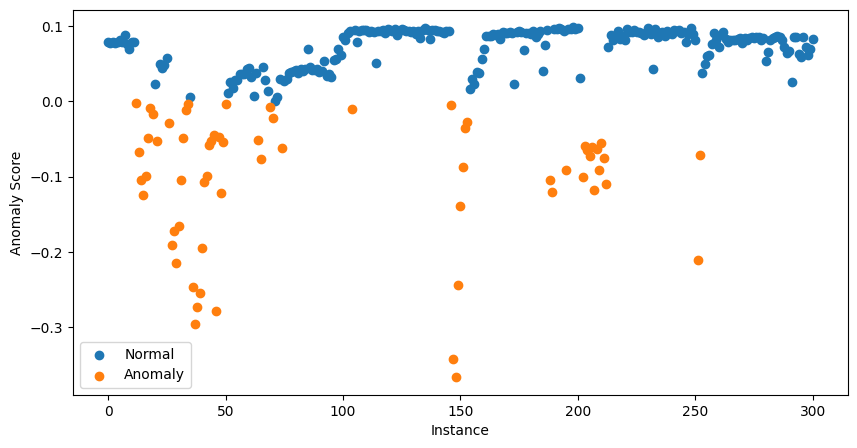

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))

# Plot normal instances
normal = data[data['anomaly'] == 1]
plt.scatter(normal.index, normal['anomaly_score'], label='Normal')

# Plot anomalies
anomalies = data[data['anomaly'] == -1]
plt.scatter(anomalies.index, anomalies['anomaly_score'], label='Anomaly')
plt.xlabel("Instance")
plt.ylabel("Anomaly Score")
plt.legend()
plt.show()



In [14]:
joblib.dump(model, 'model/isolation_forest_model_v2.joblib')


['model/isolation_forest_model_v2.joblib']